Importing necessary libraries

In [ ]:
from matplotlib import pyplot as plt

import struct
import numpy as np

import cv2
from google.colab.patches import cv2_imshow

from keras import backend as k

import keras

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

Here is my dataloader function takes ubyte files and uploads to x_train, y_train, x_test, y_test.

In [ ]:
def load_mnist_data():
    # Load training data
    with open('train-images-idx3-ubyte', 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        x_train = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows, cols)

    with open('train-labels-idx1-ubyte', 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        y_train = np.fromfile(f, dtype=np.uint8)

    # Load test data
    with open('t10k-images-idx3-ubyte', 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        x_test = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows, cols)

    with open('t10k-labels-idx1-ubyte', 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        y_test = np.fromfile(f, dtype=np.uint8)

    return x_train, y_train, x_test, y_test

Calling function and controling shapes if it is okey with normal

In [ ]:
x_train, y_train, x_test, y_test = load_mnist_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
cv2_imshow(x_train[0])

Here a sample of dataset

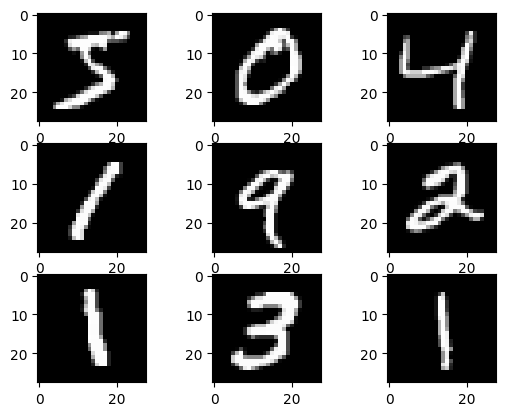

In [ ]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

Here necessary preprocessing steps

In [ ]:
img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)
 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Under this line here are 4 models that I changed hierarchy, learning rate, activation function, stride, pooling layers. 

In [ ]:
# Define the model architecture
model = models.Sequential()

# Add a convolutional layer
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))

# Add a pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))

# Add another pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the previous layer
model.add(layers.Flatten())

# Add a fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Add the output layer
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with a chosen optimizer, loss function, and evaluation metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions on test set
y_pred = model.predict(x_test)
y_pred = tf.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
print('Classification Report:\n', classification_report(y_test.argmax(axis=1), y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test.argmax(axis=1), y_pred))

Epoch 1/10
469/469 [==============================] - 80s 168ms/step - loss: 0.2169 - accuracy: 0.9366 - val_loss: 0.0623 - val_accuracy: 0.9800
Epoch 2/10
469/469 [==============================] - 80s 170ms/step - loss: 0.0586 - accuracy: 0.9817 - val_loss: 0.0542 - val_accuracy: 0.9837
Epoch 3/10
469/469 [==============================] - 75s 161ms/step - loss: 0.0405 - accuracy: 0.9875 - val_loss: 0.0303 - val_accuracy: 0.9904
Epoch 4/10
469/469 [==============================] - 79s 168ms/step - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0291 - val_accuracy: 0.9905
Epoch 5/10
469/469 [==============================] - 77s 164ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0398 - val_accuracy: 0.9874
Epoch 6/10
469/469 [==============================] - 79s 168ms/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.0316 - val_accuracy: 0.9900
Epoch 7/10
469/469 [==============================] - 77s 164ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0333 - val_ac

In [ ]:
# Define the model architecture
model2 = models.Sequential()

# Add a convolutional layer
model2.add(layers.Conv2D(16, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))

# Add a pooling layer
model2.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer
model2.add(layers.Conv2D(32, (5, 5), padding='same', activation='relu'))

# Add another pooling layer
model2.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the previous layer
model2.add(layers.Flatten())

# Add a fully connected layer
model2.add(layers.Dense(64, activation='relu'))

# Add the output layer
model2.add(layers.Dense(10, activation='softmax'))

# Compile the model with a chosen optimizer, loss function, and evaluation metric
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on test set
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc2)

# Make predictions on test set
y_pred2 = model2.predict(x_test)
y_pred2 = tf.argmax(y_pred2, axis=1)

# Print classification report and confusion matrix
print('Classification Report:\n', classification_report(y_test.argmax(axis=1), y_pred2))
print('Confusion Matrix:\n', confusion_matrix(y_test.argmax(axis=1), y_pred2))

Epoch 1/10
938/938 [==============================] - 80s 83ms/step - loss: 0.1346 - accuracy: 0.9595 - val_loss: 0.0697 - val_accuracy: 0.9784
Epoch 2/10
938/938 [==============================] - 76s 81ms/step - loss: 0.0700 - accuracy: 0.9793 - val_loss: 0.0552 - val_accuracy: 0.9824
Epoch 3/10
938/938 [==============================] - 80s 86ms/step - loss: 0.0623 - accuracy: 0.9825 - val_loss: 0.0722 - val_accuracy: 0.9812
Epoch 4/10
938/938 [==============================] - 85s 90ms/step - loss: 0.0556 - accuracy: 0.9851 - val_loss: 0.0693 - val_accuracy: 0.9800
Epoch 5/10
938/938 [==============================] - 77s 83ms/step - loss: 0.0599 - accuracy: 0.9838 - val_loss: 0.0708 - val_accuracy: 0.9813
Epoch 6/10
938/938 [==============================] - 76s 81ms/step - loss: 0.0511 - accuracy: 0.9863 - val_loss: 0.0714 - val_accuracy: 0.9801
Epoch 7/10
938/938 [==============================] - 75s 80ms/step - loss: 0.0517 - accuracy: 0.9872 - val_loss: 0.0847 - val_accuracy:

In [ ]:
# Define the model architecture
model3 = models.Sequential()

# Add a convolutional layer
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='sigmoid', input_shape=(28, 28, 1)))

# Add a pooling layer
model3.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer
model3.add(layers.Conv2D(128, (3, 3), padding='same', activation='sigmoid'))

# Add another pooling layer
model3.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the previous layer
model3.add(layers.Flatten())

# Add a fully connected layer
model3.add(layers.Dense(128, activation='sigmoid'))

# Add the output layer
model3.add(layers.Dense(10, activation='softmax'))

# Compile the model with a chosen optimizer, loss function, and evaluation metric
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on test set
test_loss3, test_acc3 = model3.evaluate(x_test, y_test)
print('Test accuracy:', test_acc3)

# Make predictions on test set
y_pred3 = model3.predict(x_test)
y_pred3 = tf.argmax(y_pred3, axis=1)

# Print classification report and confusion matrix
print('Classification Report:\n', classification_report(y_test.argmax(axis=1), y_pred3))
print('Confusion Matrix:\n', confusion_matrix(y_test.argmax(axis=1), y_pred3))

Epoch 1/10
938/938 [==============================] - 224s 238ms/step - loss: 2.3126 - accuracy: 0.1035 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 2/10
938/938 [==============================] - 261s 278ms/step - loss: 2.3063 - accuracy: 0.1042 - val_loss: 2.3084 - val_accuracy: 0.1135
Epoch 3/10
938/938 [==============================] - 225s 240ms/step - loss: 2.3063 - accuracy: 0.1067 - val_loss: 2.3034 - val_accuracy: 0.1028
Epoch 4/10
938/938 [==============================] - 208s 222ms/step - loss: 1.4060 - accuracy: 0.4785 - val_loss: 0.2022 - val_accuracy: 0.9419
Epoch 5/10
938/938 [==============================] - 212s 226ms/step - loss: 0.1458 - accuracy: 0.9574 - val_loss: 0.0982 - val_accuracy: 0.9710
Epoch 6/10
938/938 [==============================] - 210s 224ms/step - loss: 0.0910 - accuracy: 0.9732 - val_loss: 0.0753 - val_accuracy: 0.9762
Epoch 7/10
938/938 [==============================] - 211s 225ms/step - loss: 0.0681 - accuracy: 0.9803 - val_loss: 0.0613 -

In [ ]:
model4 = models.Sequential()

# First convolutional layer with 32 filters, 3x3 kernel size, and 'same' padding
model4.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))

# First pooling layer with 2x2 pool size and stride of 2
model4.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Second convolutional layer with 64 filters, 3x3 kernel size, and 'same' padding
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))

# Second pooling layer with 2x2 pool size and stride of 1
model4.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))

# Third convolutional layer with 128 filters, 3x3 kernel size, and 'same' padding
model4.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))

# Third pooling layer with 3x3 pool size and stride of 2
model4.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

# Fourth convolutional layer with 256 filters, 3x3 kernel size, and 'same' padding
model4.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))

# Fourth pooling layer with 2x2 pool size and stride of 1
model4.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))

# Flatten the output from the previous layer
model4.add(layers.Flatten())

# First fully connected layer with 512 units and relu activation
model4.add(layers.Dense(512, activation='relu'))

# Dropout layer with 0.5 rate to reduce overfitting
model4.add(layers.Dropout(0.5))

# Second fully connected layer with 10 units and softmax activation for classification
model4.add(layers.Dense(10, activation='softmax'))

# Compile the model with a chosen optimizer, loss function, and evaluation metric
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on test set
test_loss4, test_acc4 = model4.evaluate(x_test, y_test)
print('Test accuracy:', test_acc4)

# Make predictions on test set
y_pred4 = model4.predict(x_test)
y_pred4 = tf.argmax(y_pred4, axis=1)

# Print classification report and confusion matrix
print('Classification Report:\n', classification_report(y_test.argmax(axis=1), y_pred4))
print('Confusion Matrix:\n', confusion_matrix(y_test.argmax(axis=1), y_pred4))

Epoch 1/10
469/469 [==============================] - 403s 856ms/step - loss: 0.1880 - accuracy: 0.9414 - val_loss: 0.0458 - val_accuracy: 0.9836
Epoch 2/10
469/469 [==============================] - 393s 838ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0311 - val_accuracy: 0.9901
Epoch 3/10
469/469 [==============================] - 392s 836ms/step - loss: 0.0361 - accuracy: 0.9893 - val_loss: 0.0304 - val_accuracy: 0.9899
Epoch 4/10
469/469 [==============================] - 390s 831ms/step - loss: 0.0289 - accuracy: 0.9915 - val_loss: 0.0221 - val_accuracy: 0.9937
Epoch 5/10
469/469 [==============================] - 381s 813ms/step - loss: 0.0239 - accuracy: 0.9928 - val_loss: 0.0237 - val_accuracy: 0.9932
Epoch 6/10
469/469 [==============================] - 390s 831ms/step - loss: 0.0203 - accuracy: 0.9939 - val_loss: 0.0274 - val_accuracy: 0.9920
Epoch 7/10
469/469 [==============================] - 384s 820ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0297 -